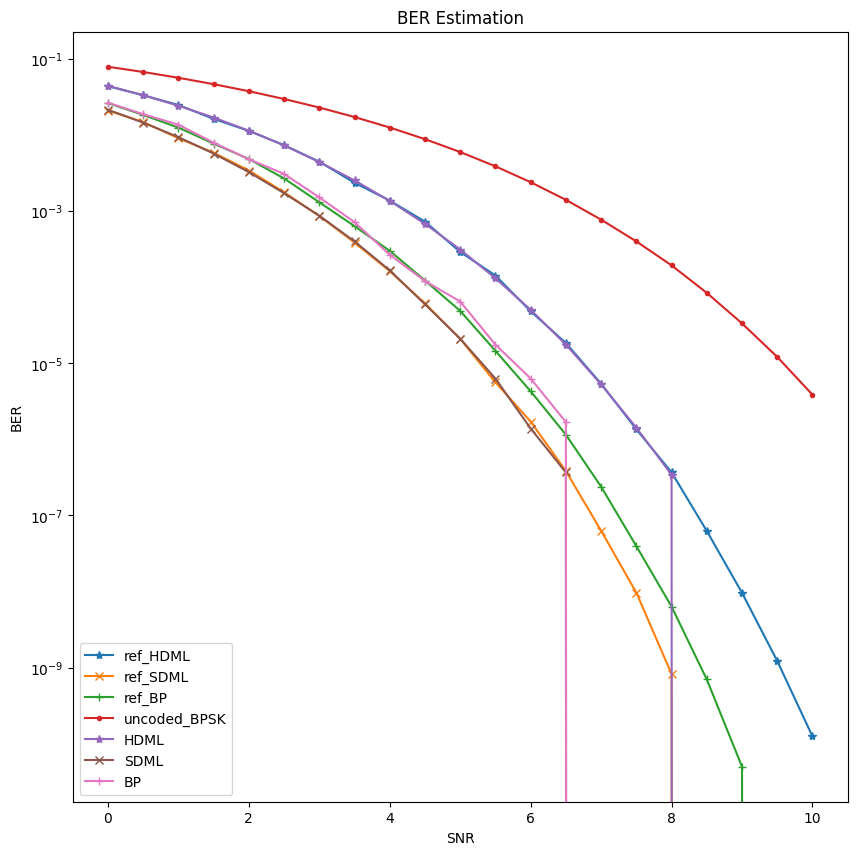

In [2]:
import matplotlib.pyplot as plt

# Data Storage Reference: and BER has changed
ref_HDML = [0.04368, 0.0331875, 0.02469, 0.01624, 0.01130, 0.00734, 0.00444, 0.00235, 0.00137, 0.000725, 0.000290, 0.000141944,
     4.81731e-05, 1.84191e-05, 5.37554e-06, 1.35552e-06, 3.68058e-07, 6.24751e-08, 9.625e-09, 1.225e-09, 1.25e-10]

ref_SDML = [0.0209, 0.014785, 0.00904, 0.0058325, 0.003405, 0.001765, 0.00085975, 0.000385625, 0.000161875, 6.10714e-05,
     2.0875e-05, 5.61659e-06, 1.71214e-06, 3.8256e-07, 6.3039e-08, 9.675e-09, 8.25e-10, 0, 0, 0, 0]

ref_BP = [0.026185, 0.01830, 0.01246, 0.0076925, 0.0048225, 0.0026775, 0.0013025, 0.0006325, 0.00029950, 0.000122045, 4.875e-05, 1.45349e-05, 4.28082e-06, 1.15101e-06, 2.38981e-07, 3.95057e-08, 6.35e-09, 7e-10, 5e-11, 0, 0] # ref BP

# ref_MLHD_int = [[0.04368, 0.02469, 0.01130, 0.00444, 0.00137, 0.000290, 4.81731e-05, 5.37554e-06, 3.68058e-07, 9.625e-09, 1.25e-10]] 
# ref_MLSD_int = [[0.0209, 0.00904, 0.003405, 0.00085975, 0.000161875, 2.0875e-05, 1.71214e-06, 6.3039e-08, 8.25e-10, 0, 0]]
# ref_BP_int = [[0.026185, 0.01246, 0.0048225, 0.0013025, 0.00029950, 4.875e-05, 4.28082e-06, 2.38981e-07, 6.35e-09, 5e-11, 0]] 


uncoded_BPSK = [0.07864588, 0.0670532, 0.05630509, 0.046395885, 0.03750538, 0.02963852, 0.02287882, 
     0.01716848, 0.012505335, 0.00879166, 0.00595442, 0.003866035, 0.00238995, 0.00140195, 
     0.00076981, 0.000398745, 0.000193015, 8.405e-05, 3.335e-05, 1.21e-05, 3.855e-06] # Uncoded BPSK



SDML = [0.021438075, 0.014477825, 0.009354125, 0.0056875, 0.003245525, 0.001715425, 0.000867975, 0.000398725,
     0.00016595, 5.9475e-05, 2.1025e-05, 6.275e-06, 1.3875e-06, 3.675e-07, 0.00000000e+00, 0.00000000e+00,
     0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]
    
HDML = [0.04415109, 0.033231805, 0.0241618475, 0.0169061, 0.0113552825, 0.0072749425, 0.00440249,
     0.0025212025, 0.0013590475, 0.0006786375, 0.0003117775, 0.0001306225, 5.03725e-05, 1.759e-05,
     5.2725e-06, 1.4225e-06, 3.425e-07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]
BP = [0.0265, 0.018725, 0.013625, 0.0079, 0.0048, 0.003075, 0.0015113636363636364, 
      7.136363636363637e-04, 2.659090909090909e-04, 1.2016129032258065e-04, 6.470588235294117e-05, 1.755e-05, 6.3e-06, 1.685e-06, 0, 0, 0, 0, 0, 0, 0]

SNR = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10]

plt.figure(figsize=(10, 10))
plt.semilogy(SNR, ref_HDML, marker='*', label='ref_HDML')
plt.semilogy(SNR, ref_SDML, marker='x', label='ref_SDML')
plt.semilogy(SNR, ref_BP, marker='+', label='ref_BP')
plt.semilogy(SNR, uncoded_BPSK, marker='.', label='uncoded_BPSK')
plt.semilogy(SNR, HDML, marker='*', label='HDML')
plt.semilogy(SNR, SDML, marker='x', label='SDML')
plt.semilogy(SNR, BP, marker='+', label='BP')

# plt.semilogy(SNR, BP, marker='+', label='BP')

plt.xlabel('SNR')
plt.ylabel('BER')
plt.title('BER Estimation')
plt.legend(['ref_HDML', 'ref_SDML','ref_BP', 'uncoded_BPSK','HDML','SDML', "BP" ], loc='lower left')

# Display the Plot
plt.show()

In [15]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim

data = torch.tensor([[[2, 0]], [[0, 1]]], dtype=torch.float)
print(data.shape)
softmax = nn.Softmax(dim=0)
result = softmax(data)
print(result)

torch.Size([2, 1, 2])
tensor([[[0.8808, 0.2689]],

        [[0.1192, 0.7311]]])
